In [2]:
import pandas as pd
df = pd.read_csv('songdata.csv')

In [3]:
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


In [4]:
df.shape

(57650, 4)

In [8]:
df.text

0        Look at her face, it's a wonderful face  \nAnd...
1        Take it easy with me, please  \nTouch me gentl...
2        I'll never know why I had to go  \nWhy I had t...
3        Making somebody happy is a question of give an...
4        Making somebody happy is a question of give an...
                               ...                        
57645    Irie days come on play  \nLet the angels fly l...
57646    Power to the workers  \nMore power  \nPower to...
57647    all you need  \nis something i'll believe  \nf...
57648    northern star  \nam i frightened  \nwhere can ...
57649    come in  \nmake yourself at home  \ni'm a bit ...
Name: text, Length: 57650, dtype: object

In [9]:
df.artist.dropna()

0                ABBA
1                ABBA
2                ABBA
3                ABBA
4                ABBA
             ...     
57645    Ziggy Marley
57646    Ziggy Marley
57647            Zwan
57648            Zwan
57649            Zwan
Name: artist, Length: 57650, dtype: object

In [13]:
a = df.artist.unique()

In [14]:
a.shape

(643,)

Text(0.5, 0, 'Bands')

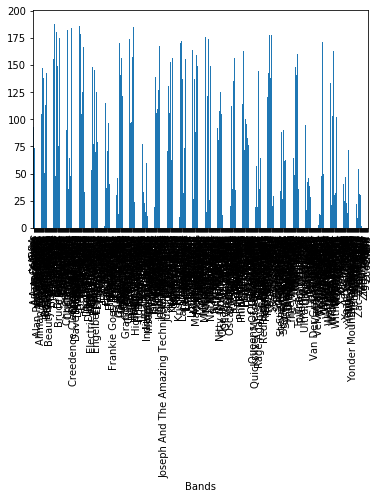

In [18]:
df.groupby('artist').song.count().plot(kind='bar').set_xlabel('Bands')

# UMAP

In [9]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [10]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [11]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

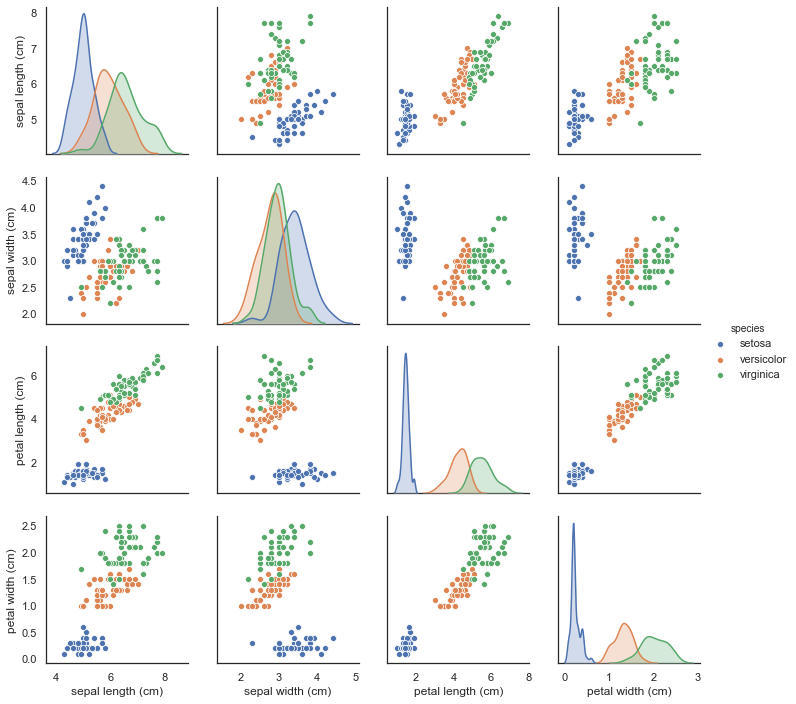

In [12]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [4]:
!pip install umap

In [5]:
!pip install "umap-learn==0.3.10"

In [13]:
import umap

In [14]:
reducer = umap.UMAP()

In [15]:
embedding = reducer.fit_transform(iris.data)
embedding.shape

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

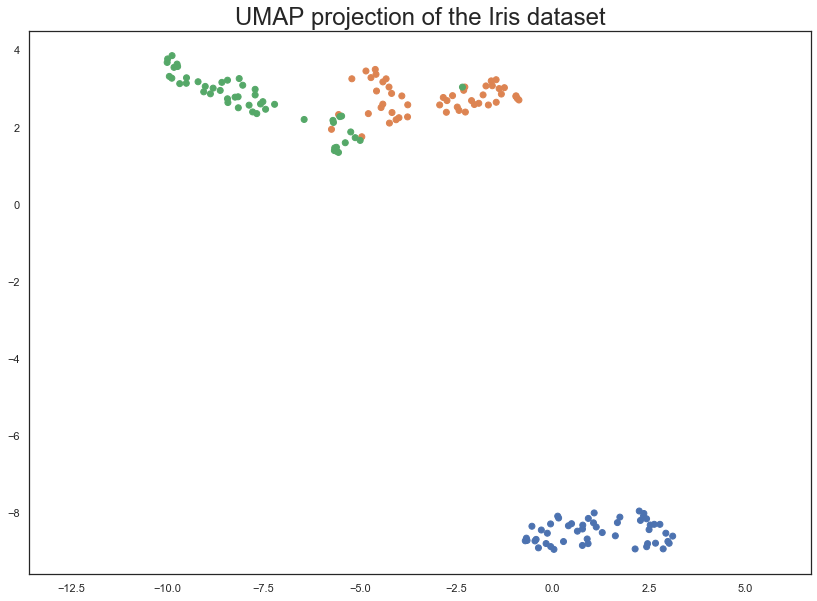

In [16]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);